In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



#Data Generation

1. **Generating Synthetic Data (Blobs)**

make_blobs(): This is a function from scikit-learn (a popular machine learning library in Python) used to create synthetic datasets. It generates "blobs" of data points, which are essentially clusters of points that follow a Gaussian (normal) distribution.

Parameters:

n_samples=5000: This sets the total number of data points (samples) you want to create (5000 in this case).
centers=[[4,4], [-2,-1], [2,-3], [1,1], [-2,-6]]: This defines the coordinates of the center points of the clusters. In this example, you'll get 5 clusters centered at the specified positions.
cluster_std=1: This sets the standard deviation of the clusters. A value of 1 means the data points within each cluster will be relatively tightly clustered around the center.

2. **Visualizing the Data:**

plt.scatter(X[:,0], X[:,1], marker='.'): This line creates a scatter plot using Matplotlib (a plotting library in Python).
X[:,0]: This extracts the x-coordinates (first feature) of all the data points.
X[:,1]: This extracts the y-coordinates (second feature) of all the data points.
marker='.': This sets the marker style for each data point in the plot to be a dot (.).

The code generates a synthetic dataset consisting of five clusters of points. It then creates a scatter plot to visualize these clusters, with each point represented by a dot.  The x and y coordinates of each dot correspond to the two features generated by make_blobs().

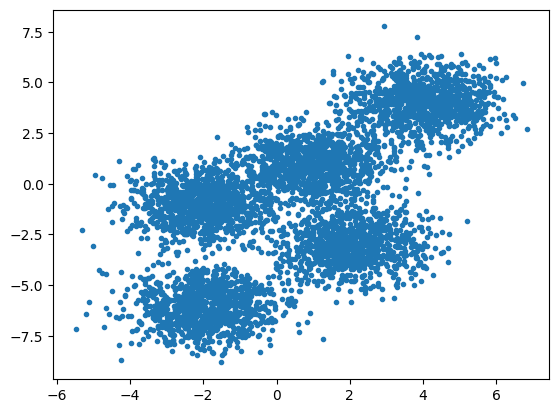

In [ ]:
#creating the dataset

X,y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,-3], [1,1], [-2,-6]], cluster_std=1)
plt.scatter(X[:,0], X[:,1], marker='.')

#Modelling

This code performs k-means clustering on your data points stored in the X array (which was created in the previous make_blobs example)

1. Setting Up the Model:

KMeans(n_clusters=5, n_init=5): This line creates a k-means clustering model.
n_clusters=5: We're telling the model to find 5 clusters in our data.
n_init=5: The algorithm will run 5 times with different random starting points to avoid getting stuck in a bad solution.

2. Finding Clusters:

k_means.fit(X): This line trains the model on your data (X). It does the following:
Randomly chooses initial cluster centers.
Assigns each data point to the nearest center.
Recalculates the cluster centers based on the assigned points.
Repeats the assignment and recalculation steps until the clusters no longer change significantly.

3. Extracting Information:

k_means_labels = k_means.labels_: This stores the cluster label (a number from 0 to 4) for each data point. So, if k_means_labels[10] == 2, it means the 11th data point belongs to cluster #2.
k_means_cluster = k_means.cluster_centers_: This stores the final coordinates (x, y) of the centers for each of the 5 clusters.

The Result

After running this code, you'll have two important things:

k_means_labels: Tells you which of the 5 clusters each of your 5000 data points belongs to.
k_means_cluster: Contains the coordinates of the 5 cluster centers that the algorithm found. You can compare these centers to the original centers you defined in make_blobs to see how well the algorithm did at identifying the underlying structure of your data.

Why This is Useful

Finding Groups: K-means clustering is a way to automatically find groups (clusters) in your data based on their similarity. This can be useful for understanding patterns or segmenting data.
Unsupervised Learning: It's an unsupervised learning method, meaning you don't need to provide pre-labeled examples. The algorithm figures out the groups on its own.



In [ ]:
#modeling. dont have to divide to train and test

k_means = KMeans(n_clusters=5, n_init=5) #n is no of iteration to fin the correct centroids
k_means.fit(X)

k_means_labels = k_means.labels_  #want to see the diffrence
k_means_cluster = k_means.cluster_centers_   #want to compare with the centroids we create
k_means_cluster

array([[ 4.00030547,  4.03787034],
       [-1.95089745, -6.06246338],
       [-2.05484351, -1.00700686],
       [ 2.05586757, -3.04070933],
       [ 1.04276184,  1.01839458]])

#Visualization

The primary goal of this code is to create a scatter plot that visualizes the results of the K-means clustering algorithm you performed earlier. The plot will show the following:

-  Data Points: Each data point in your dataset X will be represented as a dot on the plot.
-  Cluster Assignments: The color of each dot indicates which cluster it belongs to (as determined by the k-means algorithm).
-  Cluster Centers (Centroids): The center of each cluster will be marked with a larger circle, also color-coded to match the cluster.

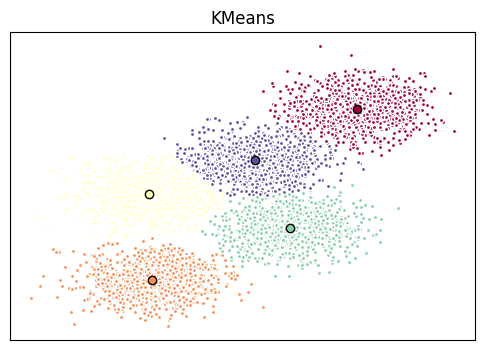

In [ ]:
#visualization

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [-2, -6]])), colors):

    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


Explanation:

**Setup:**

-  fig = plt.figure(figsize=(6, 4)): This line creates a new figure object with a specified size (6 inches wide, 4 inches high).
-  ax = fig.add_subplot(1, 1, 1): This adds a single subplot (graphing area) to the figure.
**Color Generation:**

-  colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels)))): This line generates an array of colors from the Spectral colormap, with the number of colors matching the number of unique cluster labels in your data.
Plotting Loop:

-  for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [-2, -6]])), colors): This initiates a loop that iterates through each cluster (k) and its corresponding color (col).
-  my_members = (k_means_labels == k): This creates a boolean mask (array of True/False values) that identifies the data points belonging to the current cluster (k).
-  cluster_center = k_means_cluster[k]: This retrieves the coordinates of the cluster center for the current cluster.
-  ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.'): This line plots the data points belonging to the current cluster as dots ('.') with the specified color (col) and white edges ('w').
-  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6): This line plots the cluster center as a larger circle ('o') with the same color, a black edge ('k'), and a size of 6.
Plot Styling:

-  ax.set_title('KMeans'): Sets the title of the plot.
-  ax.set_xticks(()), ax.set_yticks(()): Removes the ticks (numerical labels) from the x and y axes.
**Display the Plot:**

plt.show(): Renders the plot on your screen.

#Elbow Method

The Elbow Method is a rule of thumb to help decide how many groups to make when sorting things.  It aims to find the right balance between having fewer groups (which is simpler) and making sure things within each group are very similar (which is more accurate).

**How to Interpret the Elbow Plot:**

The Elbow Method plot will typically show a decreasing curve. The "elbow" point is the value of k where the inertia starts to decrease more slowly, indicating that adding more clusters doesn't significantly improve the fit anymore. This elbow point is often chosen as the optimal number of clusters for the k-means model.

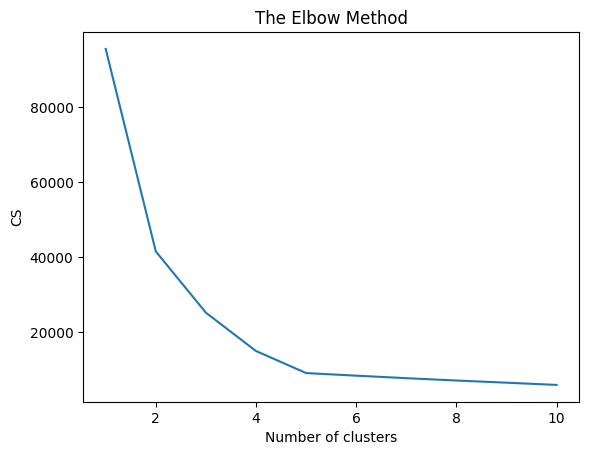

In [ ]:
#elbow method

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#the sharpest is 5- the right no of the k. no untuk k is integer